In [1]:
import sys;sys.path.append('d:/code/pywfn')

# 实用工具
定义了一些基于文件读取和分子基类的功能类，功能比较杂，可能会经常改变

所有的相关模块都定义在`pywfn.tools`子包下

## gjf
包含了对gjf文件进行快速处理的函数

### 拼接多个gjf文件
这个没啥技术难度，就是将多个gjf拼接在一起，只不过写出来方便cli中快速使用

**示例代码**

下面代码将两个相同的gjf文件拼接在一起，并返回拼接后的文本

In [2]:
from pywfn.tools.gjf import Tool as GjfTool

paths=[
    './mols/C6H6.gjf',
    './mols/C6H6.gjf'
]

tool=GjfTool()
text=tool.join(paths)
print(text)

%chk=D:\code\pywfn\tutori\mols\C6H6.chk
# b3lyp/6-31g(d) pop=full gfinput iop(3/33=1)

Title Card Required

0 1
 C                  0.00000000    1.40140000    0.00000000
 C                  1.21364800    0.70070000    0.00000000
 C                  1.21364800   -0.70070000    0.00000000
 C                  0.00000000   -1.40140000    0.00000000
 C                 -1.21364800   -0.70070000    0.00000000
 C                 -1.21364800    0.70070000    0.00000000
 H                  0.00000000    2.47140000    0.00000000
 H                  2.14029500    1.23570000    0.00000000
 H                  2.14029500   -1.23570000    0.00000000
 H                  0.00000000   -2.47140000    0.00000000
 H                 -2.14029500   -1.23570000    0.00000000
 H                 -2.14029500    1.23570000    0.00000000

--Link1--

%chk=D:\code\pywfn\tutori\mols\C6H6.chk
# b3lyp/6-31g(d) pop=full gfinput iop(3/33=1)

Title Card Required

0 1
 C                  0.00000000    1.40140000    0.000000

### 环心添加Bq原子
为了方便计算NICS值，可以在gjf在环心自动添加Bq原子

**示例代码**

下列代码在苯环中心添加了`Bq`原子，并获取到了修改后的`gjf`文本

In [3]:
from pywfn.tools.gjf import Tool as GjfTool
from pathlib import Path
path='./mols/C6H6.gjf'
print(Path(path).read_text()) # 原始的gjf文件内容
tool=GjfTool()
rings=[
    [1,2,3,4,5,6]
]
print('-'*50)
text=tool.ringBq(path,rings)
print(text) #修改后的gjf文件内容

%chk=D:\code\pywfn\tutori\mols\C6H6.chk
# b3lyp/6-31g(d) pop=full gfinput iop(3/33=1)

Title Card Required

0 1
 C                  0.00000000    1.40140000    0.00000000
 C                  1.21364800    0.70070000    0.00000000
 C                  1.21364800   -0.70070000    0.00000000
 C                  0.00000000   -1.40140000    0.00000000
 C                 -1.21364800   -0.70070000    0.00000000
 C                 -1.21364800    0.70070000    0.00000000
 H                  0.00000000    2.47140000    0.00000000
 H                  2.14029500    1.23570000    0.00000000
 H                  2.14029500   -1.23570000    0.00000000
 H                  0.00000000   -2.47140000    0.00000000
 H                 -2.14029500   -1.23570000    0.00000000
 H                 -2.14029500    1.23570000    0.00000000

--Link1--

%chk=D:\code\pywfn\tutori\mols\C6H6.chk
# b3lyp/6-31g(d) pop=full gfinput iop(3/33=1)

Title Card Required

0 1
 C                  0.00000000    1.40140000    0.000000

### 刚性旋转扫描gjf
将gjf内的分子的一个键进行旋转扫描，生成多个结构拼接成一个gjf并返回文本

**示例代码**

下面代码将`1,3-丁二烯`按中间的键旋转10步，每步36°

In [4]:
from pywfn.tools.gjf import Tool as GjfTool
import numpy as np

tool=GjfTool()
path='./mols/erxi.gjf'
text=tool.scan_bond(path,1,3,10,np.pi*2/10)
print(text)

%chk=chk.chk
# b3lyp/6-31g(d) pop=full gfinput iop(3/33=1)

Title Card Required

0 1
 C   -0.44141671    0.63055158    0.00000000
 H   -1.50694501    0.53744453    0.00000000
 C    0.44141671   -0.63055158    0.00000000
 H    1.50694501   -0.53744453    0.00000000
 C   -0.13122630   -1.85824633    0.00000000
 H   -1.19675469   -1.95135355    0.00000000
 H    0.48217094   -2.73446751    0.00000000
 C    0.13122629    1.85824633    0.00000000
 H   -0.48217094    2.73446751    0.00000000
 H    1.19675469    1.95135355    0.00000000


--Link1--

%chk=chk.chk
# b3lyp/6-31g(d) pop=full gfinput iop(3/33=1)

Title Card Required

0 1
 C   -0.44141671    0.63055158    0.00000000
 H   -1.36202145    0.63889802    0.54446000
 C    0.44141671   -0.63055158    0.00000000
 H    1.50694501   -0.53744453    0.00000000
 C   -0.13122630   -1.85824633    0.00000000
 H   -1.19675469   -1.95135355    0.00000000
 H    0.48217094   -2.73446751    0.00000000
 C   -0.05232550    1.72975123   -0.68958151
 H   -0

## log工具
与log文件相关的各种工具函数

### 分割结构优化
将结构优化文件的各个步骤单独到处成独立的分子对象

**示例代码**

以下代码将结构优化过程中的每个结构提取出来并绘制能量变化曲线

[<C6H6,12>, <C6H6,12>, <C6H6,12>, <C6H6,12>]


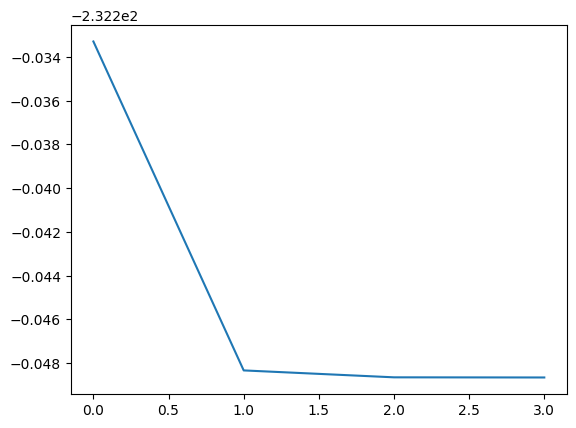

In [5]:
from pywfn.tools.log import Tool as LogTool
import matplotlib.pyplot as plt

tool=LogTool()
mols=tool.split_scan('./mols/C6H6_opt.out')
print(mols)
engs=[mol.energy for mol in mols]
plt.plot(engs)

## xml
对chemdraw文件处理的相关函数

### ChemDraw分子绘制

将chendraw文件中的分子按照点和线绘制出来

**示例代码**

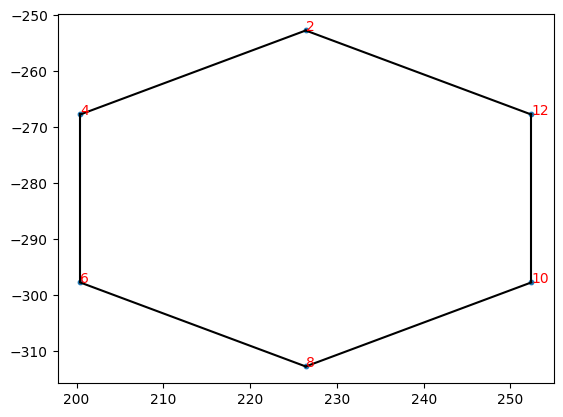

In [6]:
from pywfn.tools import xml

path='mols/C6H6.cdxml'
tool=xml.Tool(path)
tool.show()

### ChemDraw分子染色

可以指定节点编号为边上颜色

**示例代码**

下面代码将苯环中的一条边变为红色

In [7]:
from pywfn.tools import xml

path='mols/C6H6.cdxml'
tool=xml.Tool(path)
tool.set_color((2,4),(1.,0.,0.))
tool.save('mols/C6H6_color.cdxml')

10


![](./imgs/cdxml上色.png)